
WHAT: This notebook runs effect estimation using the CausalModule from CausalModule.py. It is meant to serve as a reference.

WHY: A straightforward script that compiles all the necessary steps to run effect estimation.

ASSUMES: Nothing; the entire pipeline is compiled for reference

FUTURE IMPROVEMENTS: Allowing for command line arguments to specify the necessary parameters

VARIABLES:
- data: Pandas DataFrame containing the dataset.

- discovery_algorithm: Causal discovery algorithm to discover the causal graph.

- treatment_variable: The variable to be treated.

- outcome_variable: The outcome variable to be measured.

- treatment_value: The value of the treatment variable for the treatment group.

- control_value: The value of the treatment variable for the control group.

WHO: S.K.S 2025/08/19

## Preliminaries

I would suggest that you first suppress warnings as it alleviates some really annoying and persistent library update messages.

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Preparation

Next, for the data preparation -- I am using a synthetic dataset directly from DoWhy but you should change as needed.

Please do note the data types of the columns and also the general format.

* It is pretty important that there are no missing values
* Also, just as important, that all data is numeric
* Ensure that the column data types are correct; in the scenario where a variable is discrete ensure that the dtype is [int]

In [3]:
import dowhy.datasets
dataset = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_treatments=1,
        num_samples=10000,
        treatment_is_binary=True,
        outcome_is_binary=True,
        stddev_treatment_noise=10)
data = dataset['df']

print("setting the treatment and outcome variable dtypes to be of type integer...")
data['v0'] = data['v0'].astype(int) 
data['y'] = data['y'].astype(int)

print("====================================================================")

print(f"data dtypes:\n {data.dtypes}")

print("====================================================================")

print("data preview...")
print(data.head())
print()
print(f"treatment variable: {dataset['treatment_name']}")
print(f"outcome variable: {dataset['outcome_name']}")
print("====================================================================")
discovery_algorithm = "pc" 
treatment_variable = dataset['treatment_name'][0]
outcome_variable = dataset['outcome_name'][0]
treatment_value = 1
control_value = 0

/opt/anaconda3/envs/iocp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


setting the treatment and outcome variable dtypes to be of type integer...
data dtypes:
 Z0    float64
Z1    float64
W0    float64
W1    float64
W2    float64
W3    float64
W4    float64
v0      int64
y       int64
dtype: object
data preview...
    Z0        Z1        W0        W1        W2        W3        W4  v0  y
0  1.0  0.916212 -0.198649  0.987167 -0.558834 -1.444383  2.658360   1  1
1  1.0  0.386057  0.684734  0.164196 -2.800729 -1.954772  0.563060   1  1
2  1.0  0.101681  0.415059  0.595135 -0.997031 -1.781538  0.020752   1  1
3  1.0  0.451706  0.157722  0.038586 -1.232173  1.345840  1.441345   1  1
4  1.0  0.159676 -0.991509  1.942185 -0.909079 -0.572713  1.211189   1  1

treatment variable: ['v0']
outcome variable: y


## Causal Pipeline for Classification

Remember that the current state of the module [08/19/25] covers two separate causal tasks -- effect estimation and classification using intereventional samples.

The below is for the latter task of classification.

We should begin by first creating an instance of the custom CausalModule class.

In [4]:
from CausalModule import CausalModule

causal_module = CausalModule(
    data=data,
    treatment_variable=treatment_variable,
    outcome_variable=outcome_variable,
)

2025-08-19 17:42:09,450 INFO: CausalModule initialized with provided parameters.


Next, let's discover a causal graph. If you already have a causal graph, you can alternatively use `input_causal_graph()` but for now let's assume that we are yet to discover the causal graph.

In [5]:
causal_module.find_causal_graph(algo=discovery_algorithm)

2025-08-19 17:42:09,455 INFO: Finding causal graph using pc algorithm
Depth=4, working on node 8: 100%|██████████| 9/9 [00:00<00:00, 3004.04it/s]


Now that we have discovered a causal graph, it might be a good idea to first see how the graph looks like.

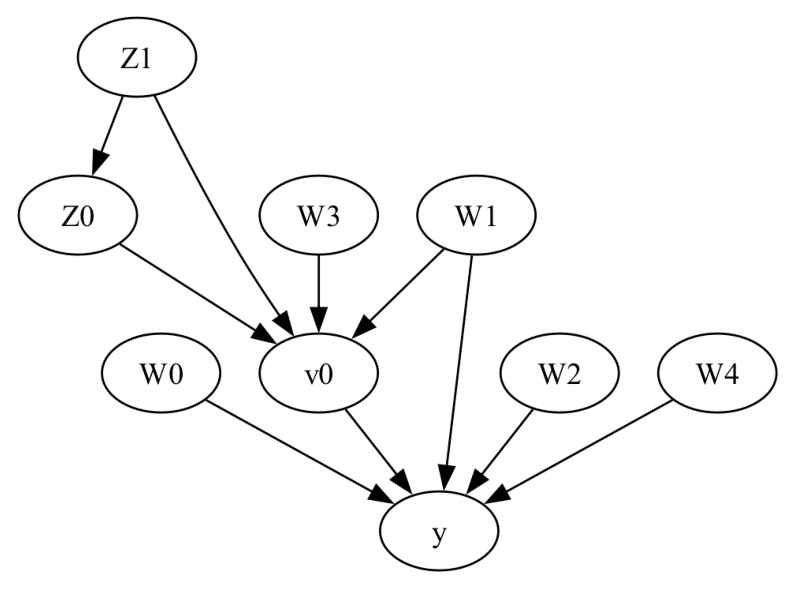

In [6]:
causal_module.see_graph()

It might also be a good idea to see the graph properties.

In [7]:
causal_module.see_graph_properties()

2025-08-19 17:42:09,979 INFO: ==========================================
2025-08-19 17:42:09,980 INFO: Number of nodes: 9
2025-08-19 17:42:09,980 INFO: ==========================================
2025-08-19 17:42:09,981 INFO: Number of edges: 10
2025-08-19 17:42:09,981 INFO: ==========================================
2025-08-19 17:42:09,982 INFO: Edge: Z0 -> v0, Weight: 1
2025-08-19 17:42:09,982 INFO: Edge: Z1 -> Z0, Weight: 1
2025-08-19 17:42:09,982 INFO: Edge: Z1 -> v0, Weight: 1
2025-08-19 17:42:09,983 INFO: Edge: W0 -> y, Weight: 1
2025-08-19 17:42:09,983 INFO: Edge: W1 -> v0, Weight: 1
2025-08-19 17:42:09,983 INFO: Edge: W1 -> y, Weight: 1
2025-08-19 17:42:09,984 INFO: Edge: W2 -> y, Weight: 1
2025-08-19 17:42:09,984 INFO: Edge: W3 -> v0, Weight: 1
2025-08-19 17:42:09,984 INFO: Edge: W4 -> y, Weight: 1
2025-08-19 17:42:09,985 INFO: Edge: v0 -> y, Weight: 1
2025-08-19 17:42:09,985 INFO: ==========================================
2025-08-19 17:42:09,985 INFO: Paths from v0 [treatment

{'num_nodes': 9,
 'num_edges': 10,
 'edge_weights': {'Z0->v0': 1,
  'Z1->Z0': 1,
  'Z1->v0': 1,
  'W0->y': 1,
  'W1->v0': 1,
  'W1->y': 1,
  'W2->y': 1,
  'W3->v0': 1,
  'W4->y': 1,
  'v0->y': 1},
 'all_paths': [['v0', 'y']],
 'treatment_mb': ['W4', 'y', 'W1', 'W3', 'Z0', 'W2', 'Z1', 'W0'],
 'outcome_mb': ['W4', 'W1', 'v0', 'W2', 'W0']}

It is crucial that we validate the graph and make changes if relations in the graph don't align with the statistical relations in the data.

For now I will just test with 10 permutations to preserve time and resources. Remember that you can utilize n_jobs to make this run faster if needed.

In [8]:
causal_module.refute_cgm(n_perm=10)

2025-08-19 17:42:09,992 INFO: Refuting the discovered/given causal graph
Test permutations of given graph: 100%|██████████| 10/10 [00:29<00:00,  2.91s/it]


We can take a look at what the graph refutation results look like.

In [9]:
causal_module.see_graph_refutation()

2025-08-19 17:42:46,807 INFO: Graph refutation metrics: TPA: 0/10 (p-value: 0.00), LMC: 7/49 (p-value: 0.00)


In the above graph refutation result the two fraction/p-values represent the following (respectively):

* Measure whether the LCMs implied by our graph satisfy the data. Compares the number of LCMs violated by our graph with the number of LCMs violated by a randomly permuted set of graphs.

* Check whether the graph is falsifiable. Assuming our graph is correct, how many other permuted graphs share the same number of LCM violations.


We might also want to see what the graph now looks like (since the function could have made modifications to the original graph if some relations hadn't matched with the data).

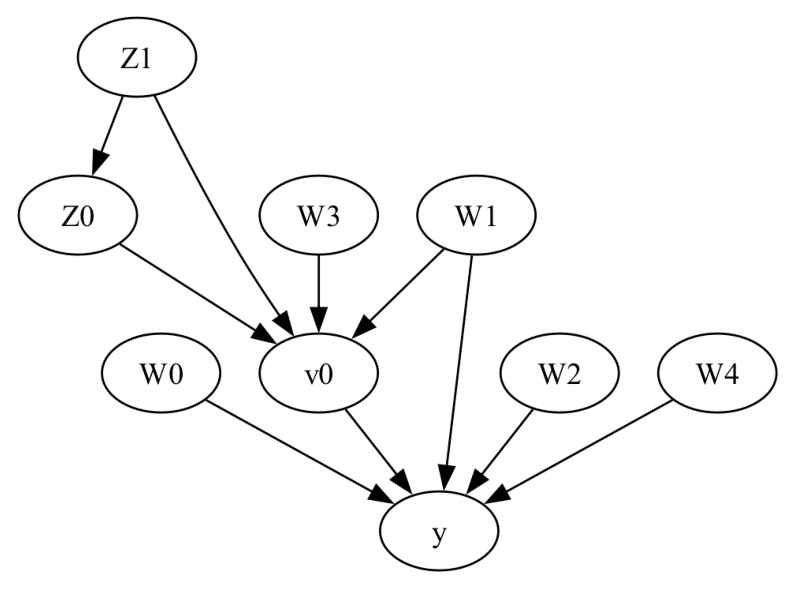

In [10]:
causal_module.see_graph()

Next, we should create a causal model that can be understood by DoWhy.

In [11]:
causal_module.create_model()

2025-08-19 17:42:47,029 INFO: Creating a causal model from the discovered/given causal graph
2025-08-19 17:42:47,030 INFO: Model to find the causal effect of treatment ['v0'] on outcome ['y']


## Saving the module instance

Now imagine we want to save the module instance to load it back in later, how can we do this?

We need to first import some utility functions from `utilities/utils.py`

In [12]:
from utilities.utils import save_instance_to_pickle, load_instance_from_pickle

In [13]:
save_instance_to_pickle(instance=causal_module, file_path='model/081925_5:30.pkl')

CausalModule instance saved to model/081925_5:30.pkl


## Loading module instance

Now let's load back in the module instance and continue with the classification task.

In [14]:
causal_module_loaded = load_instance_from_pickle(file_path='model/081925_5:30.pkl')

CausalModule instance loaded from model/081925_5:30.pkl


### Classification

For now I will only predict for the first 5 instances in the dataset.

In [15]:
causal_module_loaded.batch_classify(intervention_df=data[:5], outcome_var=outcome_variable, num_samples_to_draw=10)

Fitting causal mechanism of node y: 100%|██████████| 9/9 [00:00<00:00, 22.76it/s]


,prediction,confidence
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


All **RELEVANT** metrics are first stored in the instance itself and can be retrieved like this.

In [16]:
causal_module_loaded.store_results()

2025-08-19 17:42:50,685 INFO: ==========================================
2025-08-19 17:42:50,685 INFO: Number of nodes: 9
2025-08-19 17:42:50,686 INFO: ==========================================
2025-08-19 17:42:50,686 INFO: Number of edges: 10
2025-08-19 17:42:50,687 INFO: ==========================================
2025-08-19 17:42:50,687 INFO: Edge: Z0 -> v0, Weight: 1
2025-08-19 17:42:50,687 INFO: Edge: Z1 -> Z0, Weight: 1
2025-08-19 17:42:50,688 INFO: Edge: Z1 -> v0, Weight: 1
2025-08-19 17:42:50,688 INFO: Edge: W0 -> y, Weight: 1
2025-08-19 17:42:50,688 INFO: Edge: W1 -> v0, Weight: 1
2025-08-19 17:42:50,689 INFO: Edge: W1 -> y, Weight: 1
2025-08-19 17:42:50,689 INFO: Edge: W2 -> y, Weight: 1
2025-08-19 17:42:50,690 INFO: Edge: W3 -> v0, Weight: 1
2025-08-19 17:42:50,690 INFO: Edge: W4 -> y, Weight: 1
2025-08-19 17:42:50,690 INFO: Edge: v0 -> y, Weight: 1
2025-08-19 17:42:50,691 INFO: ==========================================
2025-08-19 17:42:50,691 INFO: Paths from v0 [treatment

Note the warnings in the logger in the above output -- these should help navigate missing results. In our case we did not perform effect estimation and so those results are not stored.

In [17]:
causal_module_loaded.results.keys()

dict_keys(['graph_properties', 'graph_refutation', 'node_quality_score', 'graph_quality_score', 'graph_quality_summary', 'classification_predictions'])

In [18]:
print(causal_module_loaded.results['graph_quality_score'])

[[13  3]
 [ 0 20]]
